In [1]:
import pandas as pd

# Read the CSV file from Google Drive
df = pd.read_csv('/content/drive/MyDrive/EDS Minor Project/Dataset.csv')

## 1.Find the student who got the maximum marks?

In [ ]:
# Find the student with the maximum marks
max_marks = df['JEE Mains Marks'].max()
student_max_marks = df.loc[df['JEE Mains Marks'] == max_marks, 'Student Name'].values[0]

# Print the student with the maximum marks
print(f"The student with the maximum marks is: {student_max_marks}")


The student with the maximum marks is: Arjun Gupta


## 2.Find the average marks of female students?

In [ ]:
# Filter the DataFrame for female students
female_students = df[df['Gender'] == 'Female']

# Calculate the average marks of female students
avg_marks_female = female_students['JEE Mains Marks'].mean()

# Print the average marks of female students
print("Average marks of female students:", avg_marks_female)


Average marks of female students: 186.2


##3.How many boys got above 190 marks?

In [ ]:
# Filter the DataFrame for boys who scored above 190 marks
boys_above_190 = df[(df['Gender'] == 'Male') & (df['JEE Mains Marks'] > 190)]

# Count the number of boys above 190 marks
num_boys_above_190 = len(boys_above_190)

# Print the number of boys above 190 marks
print("Number of boys with marks above 190:", num_boys_above_190)


Number of boys with marks above 190: 2


##4.Find the students who got the same marks?

In [ ]:
# Group the DataFrame by JEE Mains Marks and retrieve groups with more than one student
same_marks_group = df.groupby('JEE Mains Marks').filter(lambda group: len(group) > 1)

# Get the unique marks for which multiple students have scored
same_marks = same_marks_group['JEE Mains Marks'].unique()

# Iterate through each unique marks value and print the names of students with the same marks
for marks in same_marks:
    students_with_same_marks = same_marks_group[same_marks_group['JEE Mains Marks'] == marks]
    student_names = students_with_same_marks['Student Name'].tolist()
    print("Students with marks", marks, ":", student_names)


Students with marks 180 : ['Aarav Sharma', 'Isha Singh', 'Shivam Gupta']
Students with marks 195 : ['Aanya Patel', 'Harsh Joshi', 'Kavya Kapoor', 'Sanvi Singh']
Students with marks 175 : ['Advait Singh', 'Mihir Patel']
Students with marks 185 : ['Aishwarya Desai', 'Rohan Kumar']
Students with marks 190 : ['Akash Verma', 'Pranav Bhatia']
Students with marks 200 : ['Arjun Gupta', 'Nandini Sharma']
Students with marks 188 : ['Karthik Nair', 'Vaishnavi Patel']


###5.How many boys and girls are there?

In [ ]:
# Count the number of boys and girls
num_boys = df[df['Gender'] == 'Male'].shape[0]
num_girls = df[df['Gender'] == 'Female'].shape[0]

# Print the counts
print("Number of boys:", num_boys)
print("Number of girls:", num_girls)


Number of boys: 10
Number of girls: 10


##6.Make a pie chart of marks scored by students

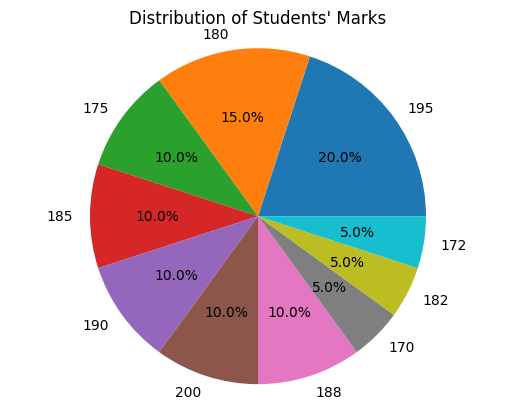

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by marks and count the number of students in each category
marks_count = df['JEE Mains Marks'].value_counts()

# Plot the pie chart
plt.pie(marks_count, labels=marks_count.index, autopct='%1.1f%%')

# Set the aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Set the title
plt.title('Distribution of Students\' Marks')

# Show the pie chart
plt.show()


## 7.Plot a graph of maximum marks of male and minimum marks of female student

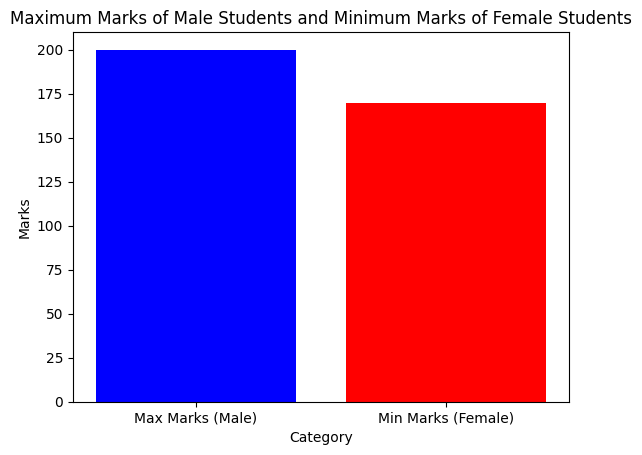

In [ ]:
# Filter the DataFrame for male and female students
male_students = df[df['Gender'] == 'Male']
female_students = df[df['Gender'] == 'Female']

# Find the maximum marks of male students and the minimum marks of female students
max_marks_male = male_students['JEE Mains Marks'].max()
min_marks_female = female_students['JEE Mains Marks'].min()

# Create the bar plot
plt.bar(['Max Marks (Male)', 'Min Marks (Female)'], [max_marks_male, min_marks_female], color=['blue', 'red'])

# Set the labels for X and Y axes
plt.xlabel('Category')
plt.ylabel('Marks')

# Set the title of the graph
plt.title('Maximum Marks of Male Students and Minimum Marks of Female Students')

# Show the plot
plt.show()


## 8.Linear Regression

Linear Regression Equation: Age = -0.01 * JEE Mains Marks + 20.55


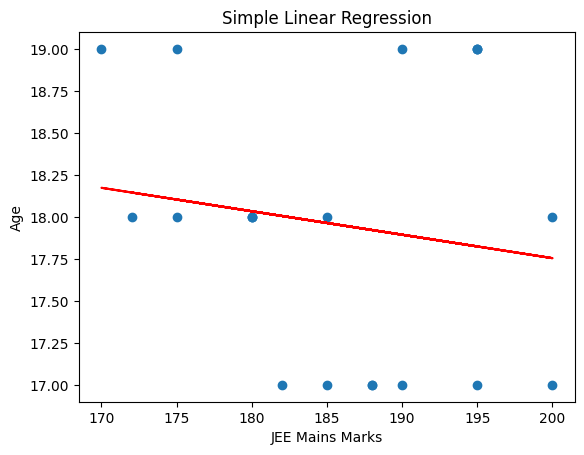

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



# Split the data into features (JEE Mains Marks) and target (Age)
X = df[['JEE Mains Marks']]
y = df['Age']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Print the equation of the line
print("Linear Regression Equation: Age = {:.2f} * JEE Mains Marks + {:.2f}".format(coef, intercept))

# Plot the data points and regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('JEE Mains Marks')
plt.ylabel('Age')
plt.title('Simple Linear Regression')
plt.show()


##9.K-NN Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (JEE Mains Marks) and target (Gender)
X = df[['JEE Mains Marks']]
y = df['Gender']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("K-NN Classification Accuracy:", accuracy)


K-NN Classification Accuracy: 0.5


##10.K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


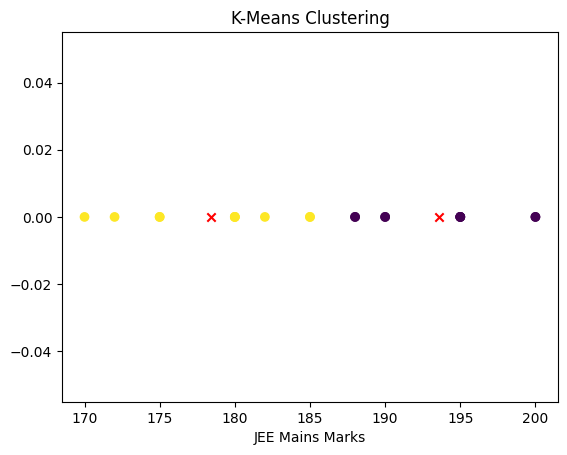

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Get the features (JEE Mains Marks)
X = df[['JEE Mains Marks']]

# Create a K-Means clustering model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Plot the data points and clusters
plt.scatter(X, [0] * len(X), c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_, [0, 0], c='red', marker='x')
plt.xlabel('JEE Mains Marks')
plt.title('K-Means Clustering')
plt.show()
